In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.stats import entropy as scipy_entropy
from scipy.optimize import linear_sum_assignment as linear_assignment
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import entropy
from collections import Counter

In [50]:
# 加載數據
sizes3_df = pd.read_csv('D:\\TEST3\\sizes3.csv')

In [51]:
# 提取特徵和標籤
X = sizes3_df.iloc[:, :-1].values
y_true = sizes3_df.iloc[:, -1].values

In [52]:
# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# 開始計時
start_time = time.time()

In [54]:
# DBSCAN 群聚
dbscan = DBSCAN(eps=0.3, min_samples=5)
# 執行 DBSCAN 群聚
dbscan_labels = dbscan.fit_predict(sizes3_df.drop('class', axis=1))

In [55]:
def map_labels(true_labels, pred_labels):
    label_map = {}
    for pred_label in np.unique(pred_labels):
        if pred_label == -1:
            continue
        true_label = Counter(true_labels[pred_labels == pred_label]).most_common(1)[0][0]
        label_map[pred_label] = true_label
    return [label_map[label] if label in label_map else -1 for label in pred_labels]

In [56]:
# 函數計算 SSE, Accuracy 和 Entropy
def compute_metrics(X, y_true, labels):
    # entropy
    ent = entropy([np.mean(labels == k) for k in set(labels) if k != -1], base=2)

    # SSE
    sse = 0
    for label in set(labels):
        if label == -1:
            continue
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            centroid = np.mean(cluster_points, axis=0)
            sse += np.sum((cluster_points - centroid) ** 2)

    # Accuracy
    mapped_labels = map_labels(y_true, labels)
    accuracy = accuracy_score(y_true, mapped_labels)

    return sse, accuracy, ent

In [57]:
# 繪製分群結果的函數
def plot_clusters(X_scaled, labels, title):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1], s=50, label=f'Cluster {i+1}')
    plt.scatter(X_scaled[labels == -1, 0], X_scaled[labels == -1, 1], s=50, color='black', label='Noise')
    plt.title(title)
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.legend()
    plt.show()

In [58]:
# 分兩群、三群和四群的 DBSCAN 參數
eps_min_samples_combinations = [(0.5, 4), (0.3, 9), (0.3, 10)]

Results for eps=0.5, min_samples=4:
SSE: 1962.7527687359102, Accuracy: 0.671, Entropy: 0.03765422930006988



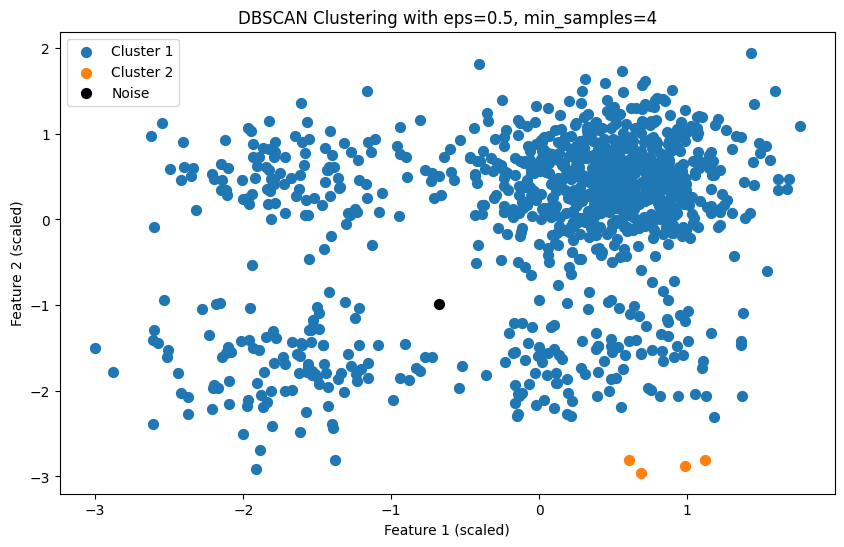

Results for eps=0.3, min_samples=9:
SSE: 733.5279347430233, Accuracy: 0.847, Entropy: 0.9109574517422577



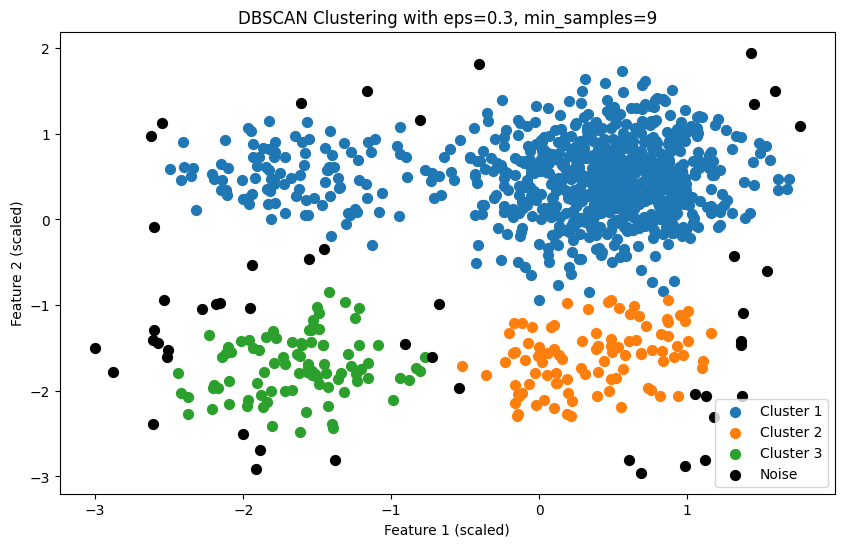

Results for eps=0.3, min_samples=10:
SSE: 349.00234834686967, Accuracy: 0.941, Entropy: 1.344729589997806



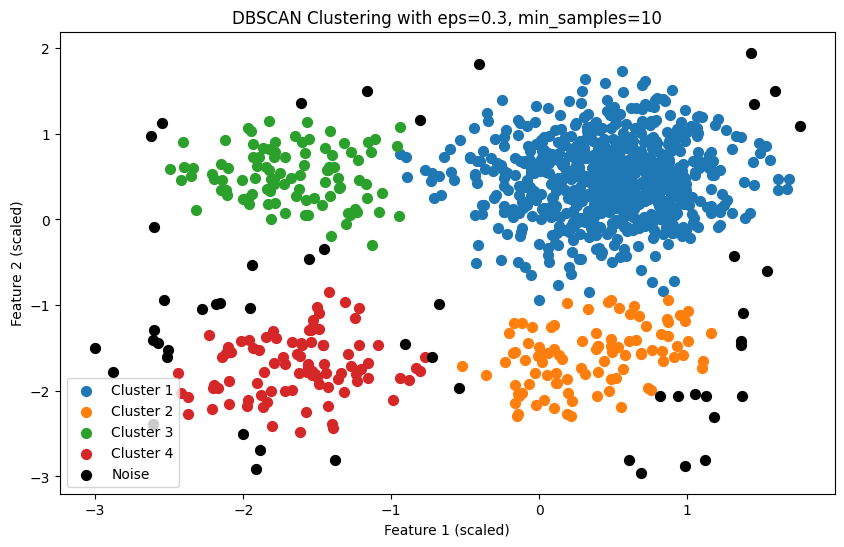

In [59]:
# 計算並顯示每種組合的結果和圖表
for eps, min_samples in eps_min_samples_combinations:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    sse, accuracy, ent = compute_metrics(X_scaled, y_true, labels)
    print(f"Results for eps={eps}, min_samples={min_samples}:")
    print(f"SSE: {sse}, Accuracy: {accuracy}, Entropy: {ent}\n")
    plot_clusters(X_scaled, labels, f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')

C:\Users\brain\AppData\Local\Temp\ipykernel_20032\3445686100.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=sizes3_df, x=sizes3_df.columns[0], y=sizes3_df.columns[1], cmap='viridis', shade=True, bw_adjust=0.5)


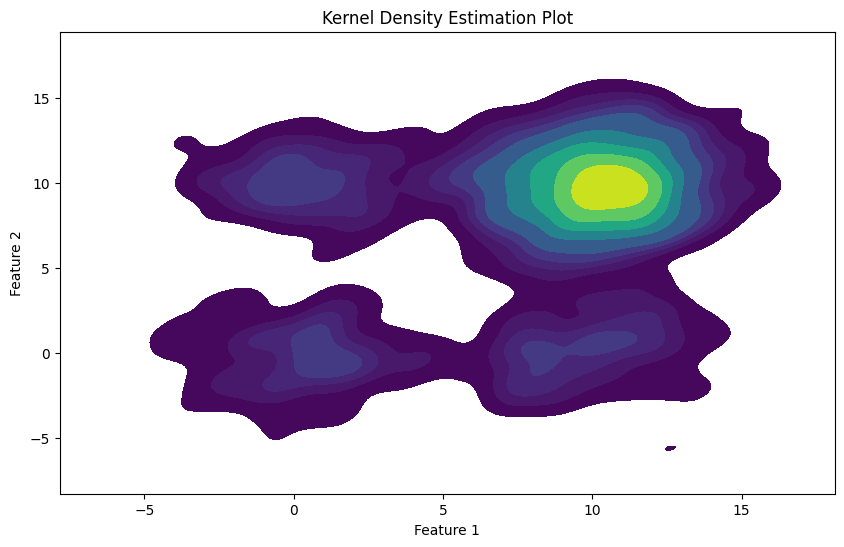

In [60]:
# 核密度估計圖 (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sizes3_df, x=sizes3_df.columns[0], y=sizes3_df.columns[1], cmap='viridis', shade=True, bw_adjust=0.5)
plt.title('Kernel Density Estimation Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

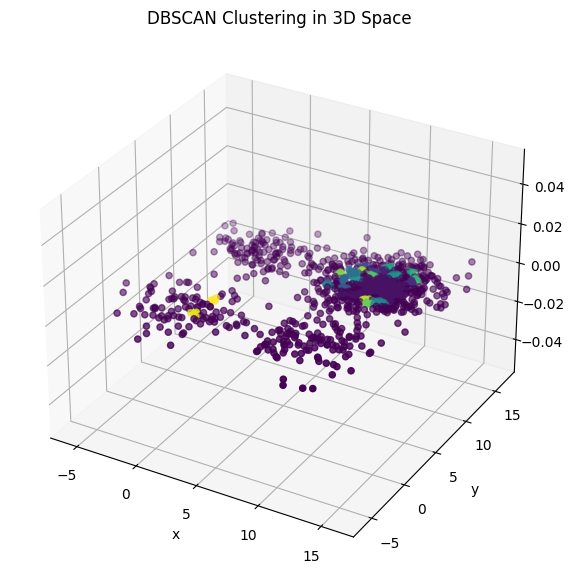

In [61]:
#三維空間中的群聚圖
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sizes3_df['x'], sizes3_df['y'], c=dbscan_labels, cmap='viridis', marker='o')
ax.set_title('DBSCAN Clustering in 3D Space')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

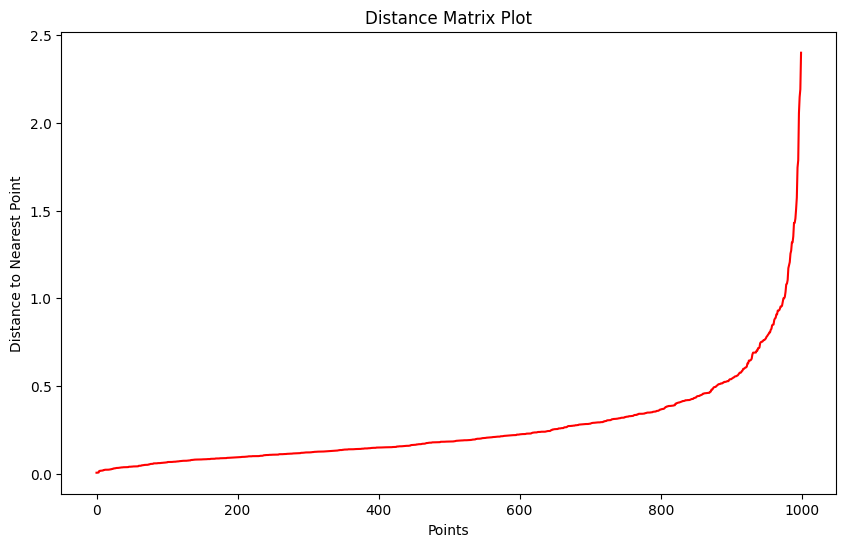

In [62]:
# 距離矩陣圖 (Distance Matrix Plot)
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(sizes3_df.drop('class', axis=1))
distances, indices = neighbors_fit.kneighbors(sizes3_df.drop('class', axis=1))
plt.figure(figsize=(10, 6))
plt.plot(np.sort(distances[:, 1]), color='red')
plt.title('Distance Matrix Plot')
plt.xlabel('Points')
plt.ylabel('Distance to Nearest Point')
plt.show()

In [63]:
# 停止計時
end_time = time.time()

# 計算所花費的時間
elapsed_time = end_time - start_time

In [64]:
print(f"DBSCAN Elapsed Time: {elapsed_time:.2f} seconds")

DBSCAN Elapsed Time: 2.34 seconds
